# py4DSTEM tutorial 1: Introduction

This tutorial introduces py4DSTEM, an python-based analysis package for 4D-STEM data, and demonstrates how to create a strain map from a 4D-STEM datacube.

This notebook includes with
- Interacting with DataCubes: how to load, slice, and display 4D data
- Filehandling: how to save and load data

In [4]:
import numpy as np
from ncempy.io import dm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import hyperspy.api as hp
from matplotlib.patches import Circle
import h5py
from scipy.ndimage.filters import gaussian_filter

import py4DSTEM
from py4DSTEM.process.calibration import get_probe_size
from py4DSTEM.process.dpc import get_CoM_images, get_rotation_and_flip, get_phase_from_CoM
from py4DSTEM.process.dpc import get_wavenumber, get_interaction_constant

### Datacubes

In [31]:
# Load a datacube

fp = "/Users/akshay/Google Drive/Data Analysis/py4DSTEM/py4DSTEM/notebooks/module_demos/dpc/Diffraction SI.dm4"
im0 = dm.dmReader(fp)
im1=(im0['data'])
dc = py4DSTEM.file.datastructure.DataCube(im1[:,:,:,:])

#dc = py4DSTEM.file.io.read(fp)

In [32]:
savepath = "/Users/akshay/Google Drive/Data Analysis/py4DSTEM/py4DSTEM/notebooks/module_demos/dpc/sample_processing_file2.h5"
py4DSTEM.file.io.save(dc, savepath)

Creating file /Users/akshay/Google Drive/Data Analysis/py4DSTEM/py4DSTEM/notebooks/module_demos/dpc/sample_processing_file2.h5...
Done.


The `dc` variable we've just defined is a py4DSTEM `DataCube` object.

##### Exercises:

- where does its data live?
- what is the shape of the data?

In [29]:
type(image_real_slice)

py4DSTEM.file.datastructure.diffraction.DiffractionSlice

The code below creates a figure with two plots...

##### Exercises:
- add to the plot on the left a single diffraction pattern from scan position $(x,y) = (30,36)$
- add to the plot on the right an image of the sample
- add to the plot on the right a marker showing scan position $(30,36)$

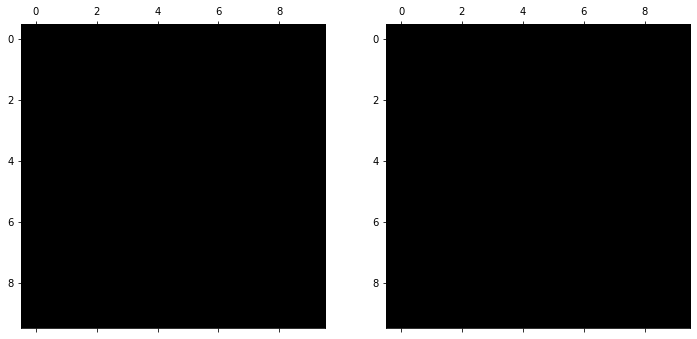

In [17]:
# Show

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax1.matshow(  np.ones((10,10))  )
ax2.matshow(  np.ones((10,10))  )
plt.show()

### Filehandling - saving and loading

For reading a writing files, py4DSTEM bundles python arrays into the following objects:
- DataCube
- RealSlice
- DiffractionSlice
- PointList
- PointListArray

Below we'll look at how to use these objects to save parts of our analysis, and then load them again later.

In [18]:
# Let's say we want to save the virtual image we created in a new file.
# The syntax is:

image = np.average(dc.data, axis=(2,3))
image_real_slice = py4DSTEM.file.datastructure.RealSlice(data=image, name='my_virtual_image')

savepath = "/Users/akshay/Google Drive/Data Analysis/py4DSTEM/py4DSTEM/notebooks/module_demos/dpc/sample_processing_file.h5"
py4DSTEM.file.io.save(image_real_slice, savepath)

Creating file /Users/akshay/Google Drive/Data Analysis/py4DSTEM/py4DSTEM/notebooks/module_demos/dpc/sample_processing_file.h5...
Done.


In [19]:
# Now let's say we want to add to this file several diffraction patterns at various scan positions.

dp_data = np.zeros((dc.Q_Nx,dc.Q_Ny,3))
dp_data[:,:,0] = dc.data[0,0,:,:]
dp_data[:,:,1] = dc.data[10,20,:,:]
dp_data[:,:,2] = dc.data[30,36,:,:]

dp_diffraction_slice = py4DSTEM.file.datastructure.DiffractionSlice(data=dp_data,
                                                                    name = 'diffraction_patterns',
                                                                    slicelabels=['dp1','dp2','dp3'])

py4DSTEM.file.io.append(dp_diffraction_slice, savepath)  # Note the change from 'save' to 'append'!

Opening file /Users/akshay/Google Drive/Data Analysis/py4DSTEM/py4DSTEM/notebooks/module_demos/dpc/sample_processing_file.h5...
Done.


In [20]:
# Let's remove these objects from memory and then reload them to make sure everything worked...

del image_real_slice, dp_diffraction_slice

In [21]:
# We can look at what's in a file before loading with a Filebrowser

browser = py4DSTEM.file.io.FileBrowser(savepath)
browser.show_dataobjects()

 Index                  Name                        Type        
   0    diffraction_patterns                DiffractionSlice    
   1    my_virtual_image                    RealSlice           


In [24]:
# Now we can load these by name:

image_real_slice = browser.get_dataobject('diffraction_patterns')

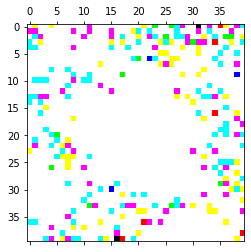

In [25]:
# Finally, we'll plot the image to make sure everything worked as expected:

fig,ax = plt.subplots()
ax.matshow(image_real_slice.data)
plt.show()